<h2 style="color:blue" align="center">Handwritten digits classification using neural network</h2>

Let us classify handwritten digits using 
1. A simple NN which has only input and output layers. 
2. NN with one hidden layer.
3. NN with two hidden layers.

and see how the performance of the model improves

<img src="problem.png" />

#### TensorFlow Installation

In [12]:
#!pip install tensorflow

In [13]:
import tensorflow as tf

In [14]:
print(tf.version.VERSION)

2.7.0


#### Import the necessary libraries

In [15]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [16]:
keras.backend.backend()

'tensorflow'

#### Load and split MNIST for training and testing

In [17]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

#### Explore the dataset

Keras Handwritten digit MNIST dataset

<img src="dataset.png" />

In [18]:
len(X_train)

60000

In [19]:
len(X_test)

10000

In [20]:
X_train[0].shape

(28, 28)

It would be something like this

<img src='pixel.png' />

In [21]:
X_train[0]
# Displays 28 x 28 pixels in 2D array

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

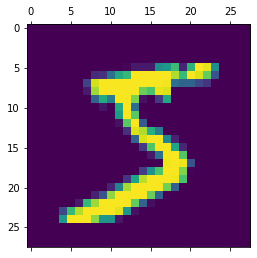

In [22]:
plt.matshow(X_train[0])

In [23]:
y_train[0]
# Label for the above input image

5

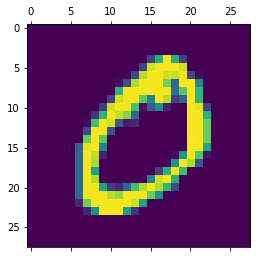

In [24]:
plt.matshow(X_train[1])

In [25]:
y_train[1]

0

In [26]:
y_train[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

#### Flattening

In [27]:
X_train.shape

(60000, 28, 28)

In [28]:
X_train.shape[1]

28

You must convert this into 6000, 784

In [29]:
X_train_flattened = X_train.reshape(len(X_train), 28 * 28)
X_train_flattened

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [30]:
X_train_flattened.shape

(60000, 784)

In [31]:
X_train_flattened[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [32]:
X_test_flattened = X_test.reshape(len(X_test),  28 * 28)
X_test_flattened

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

<h3 style='color:purple'>1. Very simple neural network with no hidden layers</h3>

<img src="model1.jpg" height=700 width=700/>

##### Model configuration

In [33]:
model1 = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation='sigmoid') 
])

##### Model summary

In [34]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [35]:
model1.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

###### Training the model

In [36]:
model1.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 2s 822us/step - loss: 9.7590 - accuracy: 0.8400
Epoch 2/5
1875/1875 [==============================] - 2s 858us/step - loss: 6.0356 - accuracy: 0.8781
Epoch 3/5
1875/1875 [==============================] - 2s 818us/step - loss: 5.6426 - accuracy: 0.8822
Epoch 4/5
1875/1875 [==============================] - 2s 830us/step - loss: 5.5601 - accuracy: 0.8856
Epoch 5/5
1875/1875 [==============================] - 2s 823us/step - loss: 5.4655 - accuracy: 0.8864


Performance is way lower. To improve the performance, normalize the input values.

###### Normalize the input dataset

In [37]:
X_train_normalized = X_train_flattened / 255

In [38]:
X_train_normalized[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [39]:
model1.fit(X_train_normalized, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 1.2861 - accuracy: 0.8335
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.8919 - accuracy: 0.8745
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6166 - accuracy: 0.8858
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4516 - accuracy: 0.8972
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3604 - accuracy: 0.9067


###### Testing the model

In [40]:
X_test_normalized = X_test_flattened / 255

In [41]:
model1.evaluate(X_test_normalized, y_test)

313/313 [==============================] - 0s 702us/step - loss: 0.3224 - accuracy: 0.9138


[0.32237890362739563, 0.9138000011444092]

Predicted probabilities for each class label on each sample in the test set

In [42]:
model1.predict(X_test_normalized)

array([[4.46765423e-02, 1.78188086e-04, 7.15967715e-02, ...,
        9.98851478e-01, 1.16910398e-01, 7.48959780e-01],
       [3.99077892e-01, 3.89820933e-02, 9.93881941e-01, ...,
        7.00574788e-07, 2.22057670e-01, 3.13689852e-05],
       [7.60015845e-03, 9.87733722e-01, 5.53013444e-01, ...,
        2.57019877e-01, 3.83148670e-01, 1.76824093e-01],
       ...,
       [3.62724066e-04, 2.57909298e-04, 1.59922838e-02, ...,
        3.42429787e-01, 5.50661147e-01, 8.55383456e-01],
       [1.50128305e-02, 5.20980358e-03, 7.06496835e-03, ...,
        1.68268681e-02, 8.12604189e-01, 1.12355649e-02],
       [3.23154002e-01, 5.83436588e-07, 6.16573036e-01, ...,
        4.99333737e-06, 9.60016251e-03, 1.69336796e-04]], dtype=float32)

Let us predict for the first image in the testing set

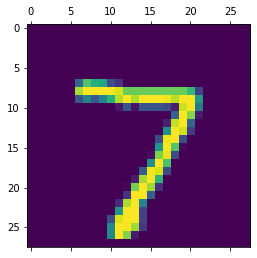

In [43]:
plt.matshow(X_test[0])

In [44]:
y_predicted = model1.predict(X_test_normalized)

In [45]:
y_predicted[0]
# Displays the probability score for each class label. 

array([4.4676542e-02, 1.7818809e-04, 7.1596771e-02, 7.5476897e-01,
       8.1745088e-02, 1.7942461e-01, 2.2536302e-05, 9.9885148e-01,
       1.1691040e-01, 7.4895978e-01], dtype=float32)

In [46]:
np.argmax(y_predicted[0])

7

The probability for 7 is 9.9885148e-01

Let us predict for the second image in the testing set

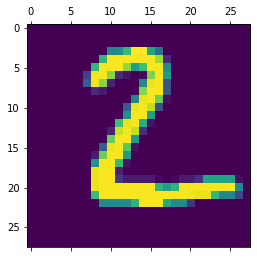

In [47]:
plt.matshow(X_test[1])

In [48]:
y_predicted[1]

array([3.99077892e-01, 3.89820933e-02, 9.93881941e-01, 2.62212694e-01,
       1.24143735e-05, 7.48334885e-01, 8.25436831e-01, 7.00574788e-07,
       2.22057670e-01, 3.13689852e-05], dtype=float32)

In [49]:
np.argmax(y_predicted[1])

2

The probability for 2 is 9.93881941e-01

###### Confusion matrix

Convert the predicted probabilities into actual class labels to contruct confusion matrix

In [50]:
y_predicted[:5]

array([[4.46765423e-02, 1.78188086e-04, 7.15967715e-02, 7.54768968e-01,
        8.17450881e-02, 1.79424614e-01, 2.25363019e-05, 9.98851478e-01,
        1.16910398e-01, 7.48959780e-01],
       [3.99077892e-01, 3.89820933e-02, 9.93881941e-01, 2.62212694e-01,
        1.24143735e-05, 7.48334885e-01, 8.25436831e-01, 7.00574788e-07,
        2.22057670e-01, 3.13689852e-05],
       [7.60015845e-03, 9.87733722e-01, 5.53013444e-01, 3.57290566e-01,
        1.56697273e-01, 2.31743962e-01, 2.94821620e-01, 2.57019877e-01,
        3.83148670e-01, 1.76824093e-01],
       [9.98207092e-01, 2.12761552e-06, 1.71819508e-01, 4.97907698e-02,
        2.48509645e-03, 3.97182703e-01, 3.98232758e-01, 1.70994043e-01,
        9.06435549e-02, 9.00064707e-02],
       [1.06473505e-01, 6.33507967e-04, 2.87120461e-01, 1.95650160e-02,
        9.67396855e-01, 7.03337193e-02, 2.39112109e-01, 4.22880024e-01,
        2.30395317e-01, 6.49553418e-01]], dtype=float32)

In [51]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [52]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    2,    1,    0,    3,    6,    1,    2,    0],
       [   0, 1105,    2,    3,    1,    2,    4,    1,   17,    0],
       [  11,    7,  908,   19,   16,    1,   12,   17,   37,    4],
       [   4,    1,   21,  912,    1,   25,    3,   16,   19,    8],
       [   2,    1,    4,    0,  920,    1,   11,    2,    9,   32],
       [  11,    6,    4,   40,   14,  759,   15,   10,   24,    9],
       [  13,    3,    7,    1,    8,   14,  909,    1,    2,    0],
       [   2,   12,   25,    4,   10,    0,    0,  940,    2,   33],
       [  10,   10,   10,   26,   11,   25,   11,   14,  845,   12],
       [  10,    5,    3,   14,   54,    7,    0,   32,    9,  875]])>

Plot this matrix

Text(69.0, 0.5, 'Truth')

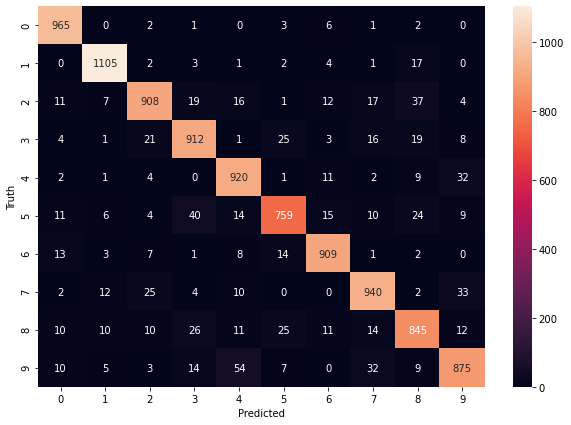

In [53]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h4 style='color:purple'>2. NN model with one hidden layer</h4> 

Adding layers should improve the performance

<img src="model2.png" height=400 width=400 />

###### Model configuration

In [54]:
model2 = keras.Sequential([
    # input layer 784 neurons to first hidden layer with 64 neurons
    keras.layers.Dense(64, input_shape = (784,), activation='relu'), 
    # Previous hidden layer to output layer
    keras.layers.Dense(10, activation='sigmoid')
])

##### Model summary

In [55]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                50240     
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [56]:
model2.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

###### Training the model

In [57]:
model2.fit(X_train_normalized, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 2s 917us/step - loss: 0.3116 - accuracy: 0.9137
Epoch 2/5
1875/1875 [==============================] - 2s 909us/step - loss: 0.1525 - accuracy: 0.9567
Epoch 3/5
1875/1875 [==============================] - 2s 892us/step - loss: 0.1116 - accuracy: 0.9679
Epoch 4/5
1875/1875 [==============================] - 2s 895us/step - loss: 0.0887 - accuracy: 0.9742
Epoch 5/5
1875/1875 [==============================] - 2s 936us/step - loss: 0.0727 - accuracy: 0.9787


###### Testing the model

In [58]:
model2.evaluate(X_test_normalized, y_test)

313/313 [==============================] - 0s 878us/step - loss: 0.0941 - accuracy: 0.9713


[0.09413113445043564, 0.9713000059127808]

Let us predict for the first image in the testing set

In [60]:
model2.predict(X_test_normalized)

array([[1.0004911e-01, 1.8262267e-03, 1.9984832e-01, ..., 9.9999869e-01,
        4.3653762e-01, 4.6398658e-01],
       [3.5234094e-03, 8.6605072e-01, 9.9999726e-01, ..., 1.8282478e-06,
        8.6112589e-01, 1.4091442e-07],
       [4.1994452e-04, 9.9706542e-01, 2.2127745e-01, ..., 2.3177141e-01,
        1.7130309e-01, 2.7160048e-03],
       ...,
       [6.6066394e-07, 1.3080239e-04, 2.5924915e-06, ..., 7.3409557e-01,
        8.3613372e-01, 8.6221349e-01],
       [1.1200309e-03, 3.1563640e-04, 1.5915080e-05, ..., 3.2316983e-02,
        9.9257135e-01, 1.5962794e-05],
       [2.5685400e-02, 7.2578638e-07, 1.8445581e-02, ..., 2.4473260e-07,
        1.6405672e-02, 4.3911441e-05]], dtype=float32)

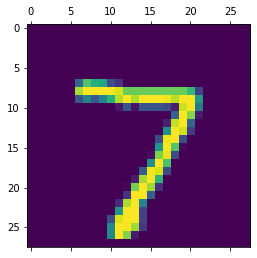

In [61]:
plt.matshow(X_test[0])

In [62]:
y_predicted = model2.predict(X_test_normalized)

In [63]:
y_predicted[0]
# Displays the probability score for each class label. 

array([1.0004911e-01, 1.8262267e-03, 1.9984832e-01, 9.9306405e-01,
       7.8678140e-06, 5.6786299e-02, 1.8056544e-06, 9.9999869e-01,
       4.3653762e-01, 4.6398658e-01], dtype=float32)

In [64]:
np.argmax(y_predicted[0])

7

###### Confusion matrix

Convert the predicted probabilities into actual class labels to contruct confusion matrix

In [65]:
y_predicted[:5]

array([[1.0004911e-01, 1.8262267e-03, 1.9984832e-01, 9.9306405e-01,
        7.8678140e-06, 5.6786299e-02, 1.8056544e-06, 9.9999869e-01,
        4.3653762e-01, 4.6398658e-01],
       [3.5234094e-03, 8.6605072e-01, 9.9999726e-01, 9.9342388e-01,
        1.2409489e-10, 4.8146451e-01, 3.8505495e-03, 1.8282478e-06,
        8.6112589e-01, 1.4091442e-07],
       [4.1994452e-04, 9.9706542e-01, 2.2127745e-01, 4.4714242e-02,
        1.7070711e-02, 3.4771860e-03, 8.4775090e-03, 2.3177141e-01,
        1.7130309e-01, 2.7160048e-03],
       [9.9997437e-01, 5.7680850e-06, 9.1143566e-01, 7.5162351e-03,
        1.1362774e-05, 4.0780783e-02, 6.9209534e-01, 7.9200798e-01,
        1.5428960e-02, 1.0488731e-01],
       [4.1146874e-03, 2.7437938e-05, 1.9890279e-02, 2.3822784e-03,
        9.9962533e-01, 4.3750554e-02, 1.1046550e-01, 7.4856889e-01,
        4.1398376e-02, 9.7764587e-01]], dtype=float32)

In [66]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [67]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    2,    1,    1,    2,    3,    1,    3,    1],
       [   0, 1123,    2,    1,    0,    1,    3,    0,    5,    0],
       [   2,    4,  996,    3,    2,    0,    2,   14,    9,    0],
       [   0,    1,    3,  989,    0,    1,    0,    5,    9,    2],
       [   1,    0,    3,    1,  953,    1,    7,    3,    2,   11],
       [   4,    0,    0,   13,    1,  848,    5,    3,   13,    5],
       [   7,    2,    4,    1,    4,    5,  927,    3,    5,    0],
       [   0,    5,    7,    3,    1,    0,    0, 1005,    2,    5],
       [   4,    1,    1,    5,    3,    4,    1,    6,  948,    1],
       [   2,    4,    0,    6,   10,    7,    0,   15,    7,  958]])>

Plot this matrix

Text(69.0, 0.5, 'Truth')

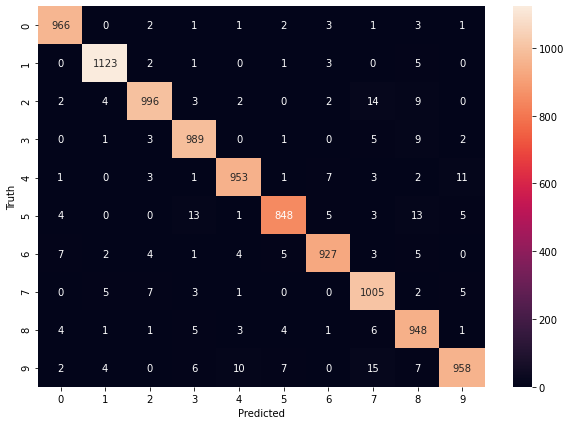

In [68]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h4 style='color:purple'>3. NN model with two hidden layers</h4> 

Adding layers should improve the performance

<img src="model3.png" height=400 width=400/>

Include flattening layer instead of manual flattening

###### Model configuration

In [69]:
model3 = keras.Sequential([
    # input layer with 784 neurons 
    keras.layers.Flatten(input_shape=(28,28)),
    # first hidden layer with 64 neurons
    keras.layers.Dense(64, activation='relu'), 
    # second hidden layer with 64 neurons
    keras.layers.Dense(64, activation='relu'), 
    # Output layer with 10 neurons
    keras.layers.Dense(10, activation='sigmoid')
])

##### Model summary

In [70]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                50240     
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [71]:
model3.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

###### Training the model

In [72]:
X_train_Norm = X_train / 255
X_test_Norm = X_test / 255
# we did not flatten separately

In [73]:
model3.fit(X_train_Norm, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2704 - accuracy: 0.9220
Epoch 2/5
1875/1875 [==============================] - 2s 926us/step - loss: 0.1208 - accuracy: 0.9639
Epoch 3/5
1875/1875 [==============================] - 2s 945us/step - loss: 0.0867 - accuracy: 0.9734
Epoch 4/5
1875/1875 [==============================] - 2s 957us/step - loss: 0.0689 - accuracy: 0.9788
Epoch 5/5
1875/1875 [==============================] - 2s 920us/step - loss: 0.0573 - accuracy: 0.9819


###### Testing the model

In [74]:
model3.evaluate(X_test_Norm, y_test)

313/313 [==============================] - 0s 794us/step - loss: 0.0901 - accuracy: 0.9724


[0.09009121358394623, 0.9724000096321106]

In [75]:
y_predicted = model3.predict(X_test_Norm)

###### Confusion matrix

Convert the predicted probabilities into actual class labels to contruct confusion matrix

In [76]:
y_predicted[:5]

array([[4.8409432e-02, 2.3420632e-02, 8.2410544e-01, 9.6585333e-01,
        1.2576742e-06, 1.2318134e-02, 5.3728657e-09, 9.9998569e-01,
        1.1969596e-02, 7.9266727e-01],
       [1.9751489e-03, 8.8835573e-01, 9.9996394e-01, 2.0857847e-01,
        4.0018559e-04, 8.1849098e-04, 6.2271953e-04, 3.5022309e-05,
        5.0367737e-01, 2.1425188e-03],
       [3.5006702e-03, 9.9972224e-01, 7.5082153e-02, 1.8882513e-02,
        2.9483777e-01, 3.1679869e-04, 1.1776835e-02, 3.8830096e-01,
        4.1947243e-01, 2.0765364e-03],
       [9.9999970e-01, 1.3075173e-03, 7.3896748e-01, 3.1749606e-03,
        6.0856342e-04, 7.8060031e-03, 6.4804780e-01, 1.0627979e-01,
        2.1030247e-02, 4.6364248e-01],
       [2.1297157e-02, 3.5530329e-04, 8.1126362e-02, 5.8370829e-03,
        9.9994004e-01, 2.5434285e-02, 5.2351058e-03, 1.1466497e-01,
        2.9408246e-02, 9.9024427e-01]], dtype=float32)

In [77]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [78]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 972,    1,    1,    0,    1,    1,    2,    0,    1,    1],
       [   0, 1122,    3,    0,    0,    1,    2,    1,    6,    0],
       [   7,    2, 1007,    0,    5,    0,    3,    3,    4,    1],
       [   0,    1,    9,  973,    1,    7,    0,    3,   12,    4],
       [   4,    1,    1,    1,  944,    0,    9,    2,    2,   18],
       [   3,    0,    0,    5,    2,  862,    6,    0,   13,    1],
       [   5,    3,    1,    0,    4,    2,  939,    0,    4,    0],
       [   1,    8,   17,    4,    1,    0,    0,  965,    4,   28],
       [   2,    1,    4,    3,    0,    1,    2,    2,  957,    2],
       [   3,    5,    0,    3,    3,    2,    1,    0,    9,  983]])>

Plot this matrix

Text(69.0, 0.5, 'Truth')

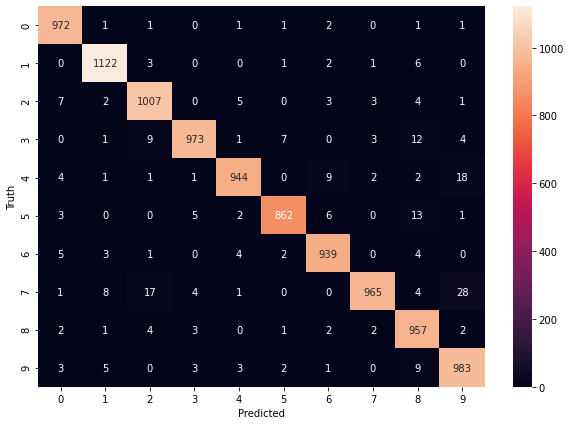

In [79]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')